# TP Séparateurs à Vaste Marge - Yoach Lacombe et Wassim Lakehal

Tout d'abord, importons les bibliothèques et la fonction utilisée dans le TP :

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.sparse
import scipy.sparse.linalg
from time import time

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

X_tilda,Y = load_breastcancer("wdbcM1B0.data")

## Question 2.1
Posons : $$ f(v,a,\xi) = \frac{1}{2}\sum\limits_{i=0}^mv_j^2 + c\sum\limits_{i=0}^n\xi_i $$
Et posons : $$ g(v,a) = \frac{1}{2}\sum\limits_{i=0}^m v_j^2 +c\sum\limits_{i=0}^n max(0,1 - y_i(x_i^Tv+a))$$



**Etape 1 :** 
Remarquons qu'avec $\xi_i = max(0,1 - y_i(x_i^Tv+a))$, les $\xi_i$ vérifient les contraintes : 
$ \forall i \in \{1,...,n\}$
, $\xi_i \geq 0$ et  $\xi_i \geq 1 - y_i(x_i^Tv+a))$.

Donc on a bien en notant $min_1$ le minimum du problème (1) et $min_2$ le minimum du problème (2) :
$$\forall(v,a),~~g(v,a) \geq min_1$$
Donc que : $ min_2 \geq min_1 $.

**Etape 2 :**
Remarquons maintenant que, par propriété du minimum : 
$$ \forall(v,a,\xi),~ f(v,a,\xi) \geq min_{\xi}f(v,a,\xi)$$
Donc, on a : 
$$ min_1 = min_{v,a,\xi}f(v,a,\xi) \geq min_{v,a}[min_\xi f(v,a,\xi)]$$
Or : $$min_\xi f(v,a,\xi) = g(v,a)$$
En effet, on remarque que pour i donné, $\xi \geq min_\xi \xi$ et ici ce minimum est atteint en la borne inférieure de la définition de $\xi$, c'est-à-dire en $max(0,1 - y_i(x_i^Tv+a)))$.

En conclusion : $$min_1 \geq min_{v,a}[g(v,a)] = min_2$$


## Question 2.2

Le résultat est direct pour tous points différents de $0$. En effet, la fonction est dérivable en tout point différent de 0 et donc le sous-gradient coïncide avec son gradient. Pour $z<0$, il n'y a donc que $\{-1\}$ et pour $z>0$, il n'y a que $\{0\}$ 

On représente (en vert) la courbe $y = max(0, 1-x)$ :

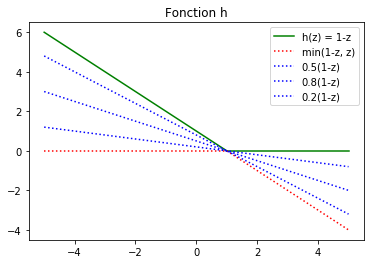

In [2]:
def h(z):
    return max(0,1-z)

np.linspace(-5,5, 10)
x = np.array([-5,1])
x_bar = np.array([1,5])
x_tot = np.array([-5,5])

plt.plot(x, 1 - x, color = 'green', label = 'h(z) = 1-z')
plt.plot(x_bar, [0,0], color = 'green')
plt.plot([1, 5], [0, -4] , color = 'red', linestyle='dotted', label = 'min(1-z, z)')
plt.plot([-5,1], [0,0] , color = 'red', linestyle='dotted')
plt.plot(x_tot, 0.5*(1-x_tot), color = 'blue', linestyle='dotted', label = '0.5(1-z)')
plt.plot(x_tot, 0.8*(1-x_tot), color = 'blue', linestyle='dotted', label = '0.8(1-z)')
plt.plot(x_tot, 0.2*(1-x_tot), color = 'blue', linestyle='dotted', label = '0.2(1-z)')
plt.title("Fonction h")
plt.legend()

En $0$, on voit que pour toutes les droites de pente entre $-1$ et $0$ (les courbes bleues) se trouvent en dessous de la courbe verte donc le sous-gradient vaut en $0$ : $[-1, 0 ]$

## Question 2.3
On renomme notre précédente fonction g en f.
    Avec $M = \left( \begin{array}{c}
y_1x_1^T ~~~ y_1\\
\vdots \\
y_ix_i^T ~~~ y_i  \\
\vdots \\
y_nx_n^T ~~~ y_n
\end{array} \right), ~~ N(v,a) = \frac{1}{2}\sum\limits_{i=0}^mv_j^2~~ $et $ ~~ H(x) = \sum\limits_{i=0}^n h(x_i)$, on a bien ce que demande l'énoncé.

De plus, on se convaint facilement que :
$$ \partial N(v,a) = \left( \begin{array}{c}
v\\
0
\end{array} \right) $$
En remarquant que H est séparable :
$$ \partial H(x) = \partial h(x_1) \times ... \times \partial h(x_n)$$


## Question 2.4


In [3]:
##Rajoutons une colonne de 1 

X = np.c_[X_tilda,np.ones((X_tilda.shape[0],1))]
n,m = X.shape

#Construction de M
M = np.array([Y[i]*X[i,:] for i in range(n)])


def fAndSubgrad(v,a):
    N = M@((np.append(v,a)))
    
    h_ = [h(N[z]) for z in range(N.shape[0])]
    
    subgrad = np.append(v,0) + M.T@(subgrad_h(N))
    value = v.T@v/2 + np.sum(h_)
    
    return value,subgrad


def subgrad_h(x):
    return -(x<=1).astype(int)

In [4]:
value, subgrad_value = fAndSubgrad(np.ones((m-1,1)), 5 )

In [5]:
def subgradientMethod(v_0,a_0,nb_iter):
    v_k = v_0[:,0]
    a_k = a_0
    func_values = []
    for k in range(nb_iter):

        func_value, sub = fAndSubgrad(v_k,a_k)

        v_k = v_k[:m-1] -sub[:m-1]/(k+1)
        a_k = a_k -sub[-1]/(k+1)
        func_values += [func_value]
    return func_value
        

In [6]:
debut = time()
print("Valeur :", subgradientMethod(np.zeros((m-1,1)), 0,10000))
print("Temps d'exécution :", time()-debut)

Valeur : 26.570582119490382
Temps d'exécution : 19.61750316619873


## Question 3.1

Par la formule de transfert :
$$ \mathbb{E}[f_I(v,a)] = \sum\limits_{i=1}^n P(I=i)f_i(v,a) = \frac{1}{n}\sum\limits_{i=1}^n f_i(v,a) = \frac{1}{2}\sum\limits_{i=1}^m v_j^2 +\frac{1}{n}cn\sum\limits_{i=1}^n max(0,1 - y_i(x_i^Tv+a)) = f(v,a) $$

## Question 3.2

Cette fois-ci, nous pouvons poser $M_i = \left( \begin{array}{c}
0\\
\vdots \\
(y_ix_i^T ~~~ y_i)  \\
\vdots \\
0
\end{array} \right)$ à la place de la matrice M et c$*$n à la place de c dans la formule du sous-gradient. D'où :
$$ \partial f_i(v,a) =  \left( \begin{array}{c}
v\\
0
\end{array} \right)  + cnM_i^T \partial H(M_i\left( \begin{array}{c}
v\\
a
\end{array} \right)) 
= \left( \begin{array}{c}
v\\
0
\end{array} \right)  + cnM_i^T \partial H\left( \begin{array}{c}
0\\
\vdots \\
(y_ix_i^Tv + y_ia)  \\
\vdots \\
0
\end{array} \right)
=
\left( \begin{array}{c}
v\\
0
\end{array} \right)  + cnM_i^T \left( \begin{array}{c}
-1\\
\vdots \\
\partial h(y_ix_i^Tv + y_ia)  \\
\vdots \\
-1
\end{array} \right) $$
$$
=
\left( \begin{array}{c}
v\\
0
\end{array} \right)  + cny_i \partial h(y_ix_i^Tv + y_ia) \left( \begin{array}{c}
x_i\\
1
\end{array} \right)
$$

## Question 3.3

Pour coder cette algorithme, nous allons tirer à chaque étape un $i_k$ et prendre $x_{k+1} = x_k - \gamma_k g_k$ où $g_k \in \partial f_{i_k}(x_k)$.

In [7]:
from random import randint

def stochasticSubgradientMethod(v_0,a_0,nb_iter):
    v_k = v_0[:,0]
    a_k = a_0
    func_values = []
    total_step = 0
    weighted_value_v = 0
    weighted_value_a = 0
    
    for k in range(nb_iter):
        #TIRER i dans {1,...,n}
        i = randint(0,n-1)
        func_value, sub = f_i_and_subgrad(v_k,a_k,i)
        
        step = (5*10**(-4))/np.sqrt(k+1)
        
        total_step += step
        weighted_value_v += v_k*step
        weighted_value_a += a_k*step
        
        
        v_k = v_k[:m-1] -sub[:m-1]*step
        
        
        a_k = a_k -sub[-1]*step
        
        func_values += [func_value]
    
    f_value,_ = fAndSubgrad(weighted_value_v/total_step , weighted_value_a/total_step)

    return f_value


def f_i_and_subgrad(v,a,i):
    
    subgrad = np.append(v,0) + n*Y[i]*subgrad_h(Y[i]*(X_tilda[i,:]@v + a))*np.append(X_tilda[i,:],1)
    
    value = v.T@v/2 + n * h(Y[i]*(X_tilda[i,:]@v + a))
    
    return value,subgrad

In [8]:
debut = time()
print("Valeur :", stochasticSubgradientMethod(np.zeros((m-1,1)), 0,10000))
print("Temps d'exécution :", time()-debut)

Valeur : 36.908097636012165
Temps d'exécution : 0.46237707138061523


## Question 4.1

Avec $\phi \in \textbf{R}^{2n}$ :
$$ L(v,\xi, \phi) = \frac{1}{2}\sum\limits_{i=0}^mv_j^2 + c\sum\limits_{i=0}^n\xi_i + \sum\limits_{i=0}^n[ -\xi_i\phi_i +\phi_{i+n}(1 - y_{i+n}(x_{i+n}^Tv+a) - \xi_{i+n})] - \sum\limits_{i=0}^{2n} \iota_{\textbf{R}_+}(\phi_i) $$

## Question 4.2

Remarquons que "$ x : \mapsto max(0,x)^2$" est une fonction continuement dérivable en 0 (on prolonge la dérivé par continuité en 0), de dérivée : "$ x : \mapsto 2max(0,x)$".

Ainsi, par dérivées de fonctions composées :
$$ \nabla_xg(x,\phi) = \rho max(0,x + \rho^{-1}\phi)$$
Et : 
$$ \nabla_{\phi}g(x,\phi) = -\rho^{-1}\phi + \frac{\rho}{\rho} max(0,x + \rho^{-1}\phi) = max(-\rho^{-1}\phi,x )$$

## Question 4.3
$ x \mapsto \nabla_xg(x,\phi) $ est donc croissante sur l'ensemble des réels, on a donc la convexité de $x \mapsto g(x,\phi)$.

De plus, $ \phi \mapsto \nabla_xg(x,\phi) $ est décroissante sur l'ensemble des réels, on a donc la concavité de $\phi \mapsto g(x,\phi)$.

## Question 4.4

On calcule d'abord les gradients de la Lagrangienne par rapport à v,a et $\xi$:
$$ \nabla_vL(v,a,\xi,\phi,\psi) = v - \sum\limits_{i=1}^n y_ix_i \rho max(0, -\xi_i + 1 - y_{i}(x_{i}^Tv+a) + \phi_i\rho^{-1})$$ 
$$ \nabla_aL(v,a,\xi,\phi,\psi) = - \sum\limits_{i=1}^n y_i \rho max(0, -\xi_i + 1 - y_{i}(x_{i}^Tv+a) + \phi_i\rho^{-1})$$ 
$$ \nabla_{\xi}L(v,a,\xi,\phi,\psi) = c - (\rho max(0, \rho^{-1}\phi_i - \xi_i))_i- ( \rho max(0, -\xi_i + 1 - y_{i}(x_{i}^Tv+a) + \phi_i\rho^{-1}))_i$$ 

D'où la méthode du gradient, ci-dessous :

In [9]:
def grad_x_g(x,phi,rho):
    return rho * np.maximum(0, x + phi/rho)


def gradient_lagrangien(phi,psi,condition_arret,rho):
    v,a,xi = np.zeros(m-1),condition_arret + 1 , np.zeros(n)
    
    N = 1 - M@((np.append(v,a)))


    grad_v = v - (M.T@grad_x_g(N-xi,phi,rho))[:-1]
    grad_a = - Y.T@grad_x_g(N-xi,phi,rho)     
    grad_xi = 1 - grad_x_g(-xi,phi,rho) - grad_x_g(N-xi,phi,rho)

    norm = grad_a**2 + np.sum(grad_v**2) + np.sum(grad_xi**2)
    k=1
    while (norm > condition_arret**2):
        grad_v = v - (M.T@grad_x_g(N-xi,phi,rho))[:-1]
        grad_a = - Y.T@grad_x_g(N-xi,phi,rho)     
        grad_xi = 1 - grad_x_g(-xi,phi,rho) - grad_x_g(N-xi,phi,rho)
         
        norm = grad_a**2 + np.sum(grad_v**2) + np.sum(grad_xi**2)
        v = v - grad_v/750     
        a = a - grad_a/750         
        xi = xi - grad_xi/750
        N = 1- M@((np.append(v,a)))

        k+=1
            
    return v,a,xi

## Question 4.5


$$ \nabla_{\phi}L(v,a,\xi,\phi,\psi) = (max( - \frac{\phi_i}{\rho}, -\xi_i))$$ 
$$ \nabla_{\psi}L(v,a,\xi,\phi,\psi) = (max( - \frac{\psi_i}{\rho}, -\xi_i + 1 - y_{i}(x_{i}^Tv+a)))$$ 

In [10]:
def grad_phi_g(x,phi,rho):
    return np.maximum(-phi/rho, x)

def grad_phi_psi(v,a,xi,phi,psi,rho):
    N = M@((np.append(v,a)))
    
    
    grad_phi = grad_phi_g(-xi,phi,rho)
    
    grad_psi = grad_phi_g(-xi + 1- N ,psi,rho)
    
    return grad_phi, grad_psi

## Question 4.6

In [11]:
def ALM(phi0, psi0, condition_arret = 1, rho = 2, nb_iterations  = 2000):
    
    phi,psi = phi0,psi0
    
    for k in range(nb_iterations):
        v,a,xi = gradient_lagrangien(phi,psi,condition_arret, condition_arret)
        
        grad_phi, grad_psi = grad_phi_psi(v,a,xi,phi,psi,rho)
        phi += rho*grad_phi
        psi += rho*grad_psi
    
    return v,a,xi

In [12]:
debut = time()
test_v,test_a,test_xi = ALM(np.zeros(n),np.zeros(n))
print("Temps d'exécution :", time()-debut)

Temps d'exécution : 629.9421944618225


In [13]:
test_v.T@test_v/2  + np.sum(test_xi)

11.162495675697487

In [14]:
fAndSubgrad(test_v,test_a)

(28.464571080831973,
 array([ 1.16933323,  1.26088753,  1.00518502,  1.2923403 , -0.54094765,
        -2.08829148, -1.55803491,  0.078724  ,  0.43130691, -2.73454178,
         3.48912349,  1.81649251,  3.3597331 ,  2.18732888, -1.24417101,
        -2.42963447, -3.05643706,  0.01012139, -1.02500591, -1.18282814,
         1.21371166, -0.00575283,  1.14693168,  1.16920323, -3.80617076,
        -3.28203098, -3.97157108, -1.18369923, -1.62633202, -3.7666303 ,
        -2.        ]))

## Question 5.1

Comparons finalement les résultats :

Tout d'abord, nous pouvons entrer dans le tableau suivant le temps d'exécution et la valeur finale que renvoie chaque algorithme :

|  | Méthode du sous-gradient classique |  Méthode du sous-gradient stochastique  | Méthode du lagrangien augmenté  |   |
|---|---|---|:-:|---|
| Résultat final  | 26.570582119490382 | 36.908097636012165 | 28.464571080831973   |   |
| Temps d'exéution  | 19.61750316619873 | 0.46237707138061523 | 629.9421944618225 |   |

Il semblerait que la méthode du lagrangien augmenté n'est pas la meilleure méthode car elle ne produit ni le résultat le plus rapide, ni le meilleur résultat.

En revanche, la méthode du sous-gradient stochastique renvoie un résultat aléatoire à chaque itération et celui-ci (bien qu'il soit rapide) n'est pas meilleur en moyenne que celui fournit par la méthode du sous-gradient classique. En effet, en effectuant $10^6$ itérations du sous-gradient stochastique, le résultat final tourne en moyenne autour de $27$ mais prend $44$ secondes. Ainsi, dans ce cas, l'algorithme de la méthode du sous-gradient stochastiqu efournit un moins bon résultat que la méthode du sous-gradient classique en plus de temps. L'algorithme du sous-gradient stochastique pourrait probablement être amélioré en prenant un sous ensemble de $f_i$ plutot qu'une seule valeur.

En définitive, il apparaît que la meilleure fonction à utiliser est la première.